In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv("C:\\Users\\SAMPATH\\Downloads\\telecom churn data.csv.csv")

In [55]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [58]:
#checking for null values
df.isnull().sum()
#no null values

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [59]:
#dropping un wanted columns
df=df.drop(["customerID"],axis=1)

In [60]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

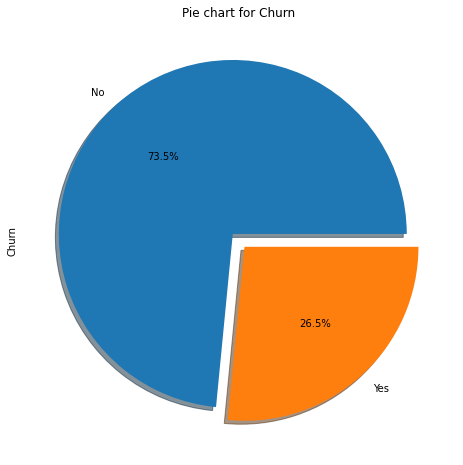

In [61]:
#pie chart for churn 
df["Churn"].value_counts().plot.pie(explode=[0.05,0.05],shadow=True,figsize=(8,8),autopct="%1.1f%%")
plt.title("Pie chart for Churn")
plt.show()

In [62]:
#saving all coulns in a list for future use
columns=df.columns

In [111]:
#let us collect categorical columns for input
catcolumns=[]
indices=[1,2,3,6,7,8,9,10,11,12,13,14,15,16]
for ele in indices:
    catcolumns.append(columns[ele])
catcolumns    

['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

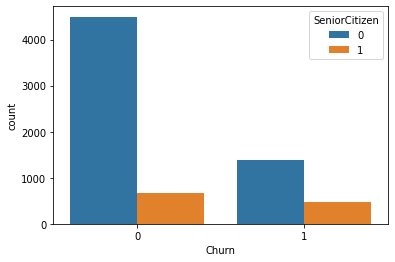

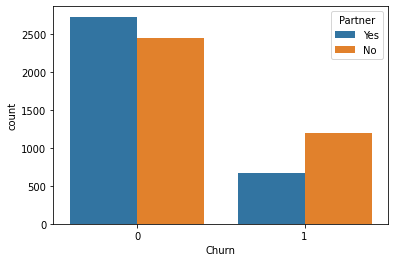

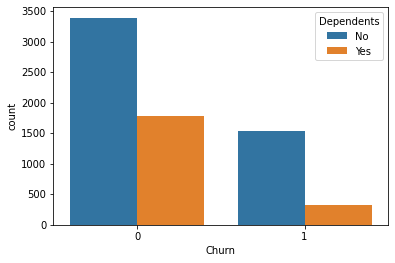

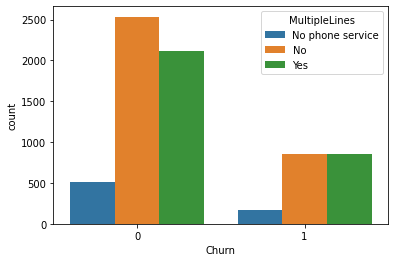

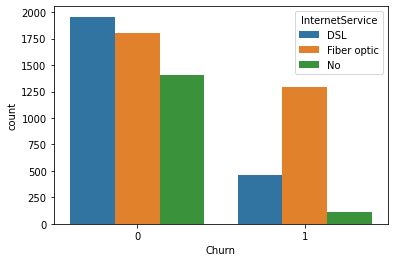

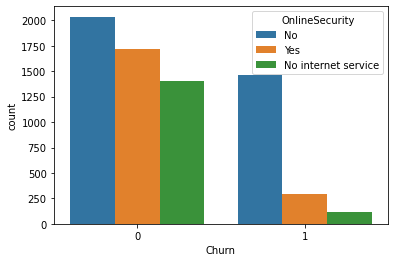

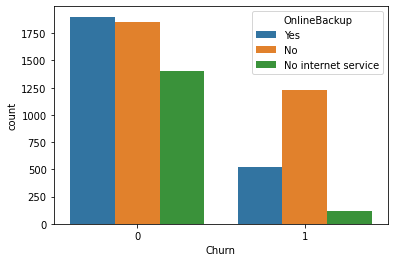

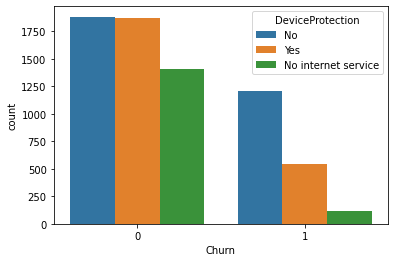

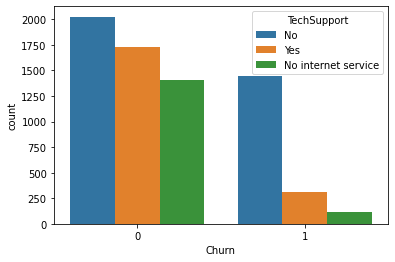

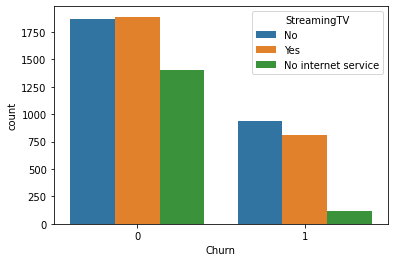

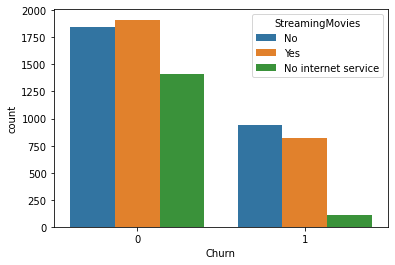

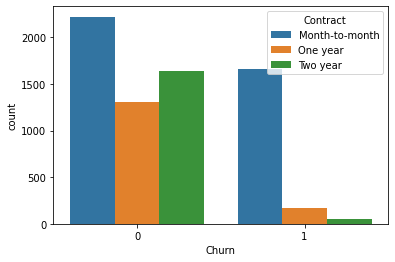

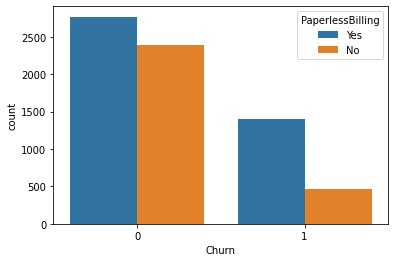

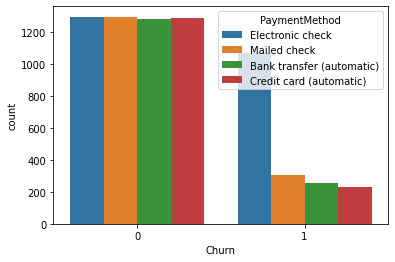

In [112]:
for ele in catcolumns:
    sns.countplot(data=df,x="Churn",hue=ele)
    plt.show()


In [65]:
#It seems like there are some " " garbage valuse in Total charges let us remove them 
l=[]
for i in range(0,len(df["TotalCharges"])):
    if df["TotalCharges"][i]==" ":
        l.append(i)
l        

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [66]:
#droping the rows using indices
df = df.drop(l)
df.shape

(7032, 20)

In [67]:
#changing the values of column named "Total Charges" to float for anlysis
df['TotalCharges'] = df['TotalCharges'].astype(float)

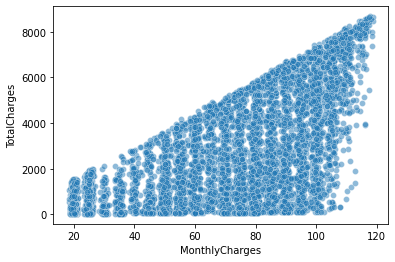

In [68]:
#let us see how  total charges and monthly charges are related to each oher
sns.scatterplot(data=df,x="MonthlyCharges",y="TotalCharges",alpha=0.5)
plt.show()


<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

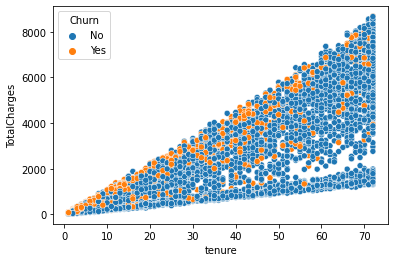

In [69]:
#relationship between tenure,churn prediction and total charges
sns.scatterplot(x="tenure",y="TotalCharges",data=df,hue="Churn")

In [70]:
#converting the target variable to numeric variable
df["Churn"]=np.where(df.Churn=="Yes",1,0)

In [71]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [72]:
#converting all categorical variables to dummy variables
df_dum=pd.get_dummies(df)
df_dum.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


<AxesSubplot:>

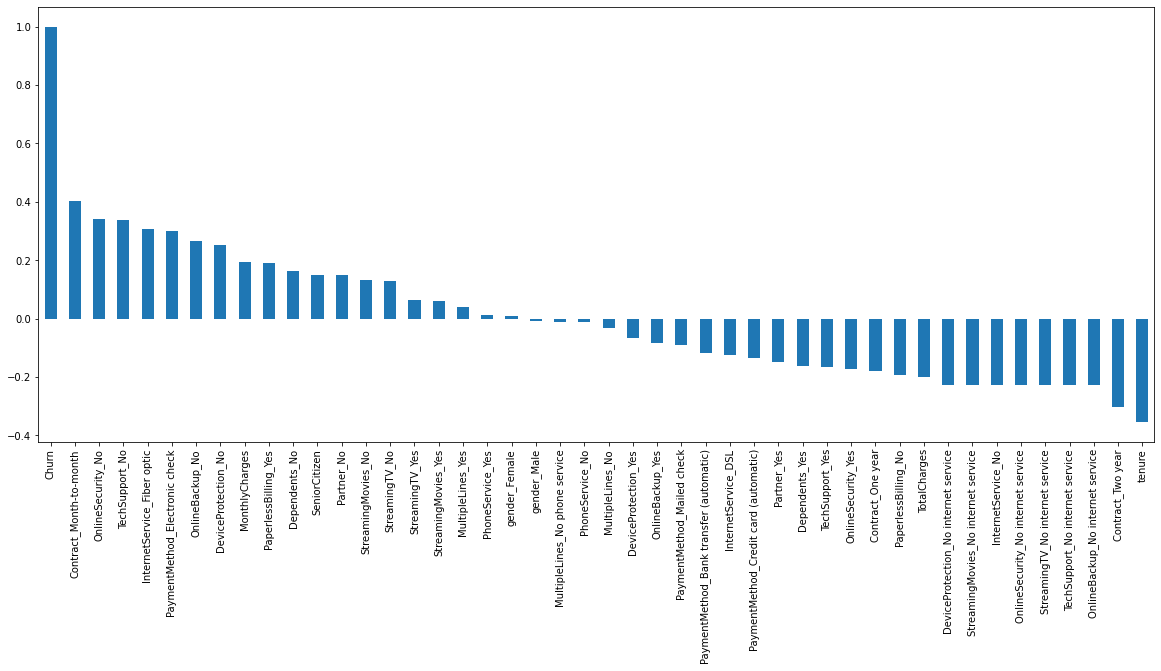

In [73]:
#builing a correlatiion of all predictores with churn
plt.figure(figsize=(20,8))
df_dum.corr()["Churn"].sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:>

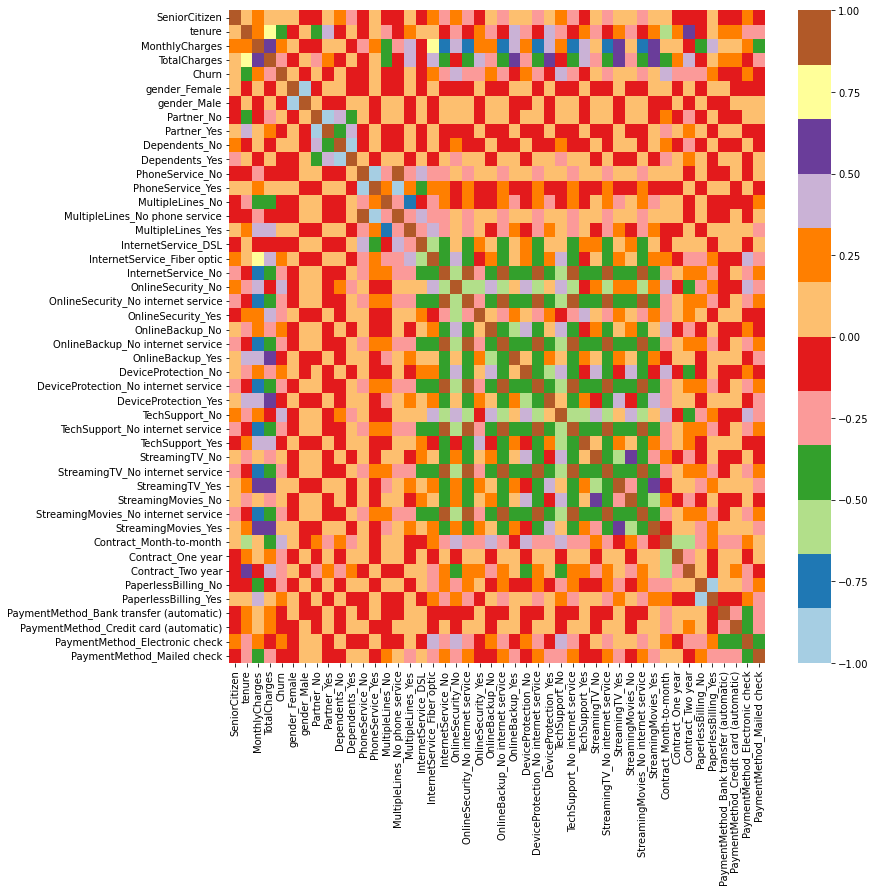

In [74]:
#creating heat map
plt.figure(figsize=(12,12))
sns.heatmap(df_dum.corr(),cmap="Paired")

In [75]:
x=df_dum.drop("Churn",axis=1)
y=df_dum["Churn"]

In [76]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [77]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [78]:
model.fit(X_train,y_train)


LogisticRegression()

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,plot_confusion_matrix,classification_report

In [80]:
y_pred=model.predict(X_test)

In [81]:
print("Accuracy score for logistic regression is "+str(accuracy_score(y_test,y_pred)))

Accuracy score for logistic regression is 0.7903340440653873


In [82]:
#printing classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1019
           1       0.66      0.50      0.57       388

    accuracy                           0.79      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



### Let us do hyper parameter tuning for logistic regression


In [98]:
param_grid = [    
    {'penalty' : [ 'l2'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ["newton-cg","lbfgs","liblinear"],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [99]:
from sklearn.model_selection import GridSearchCV

In [100]:
clf = GridSearchCV(model, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1,error_score="raise")

In [101]:
best_clf = clf.fit(X_train,y_train)

Fitting 3 folds for each of 240 candidates, totalling 720 fits


In [102]:
best_clf.best_estimator_

LogisticRegression(C=0.012742749857031334, max_iter=1000)

In [103]:
pred=best_clf.predict(X_test)

In [106]:
print("Accuracy score for logistic regression after hyper paramter tuning is "+str(accuracy_score(y_test,pred)))

Accuracy score for logistic regression after hyper paramter tuning is 0.7931769722814499


In [107]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1019
           1       0.66      0.51      0.58       388

    accuracy                           0.79      1407
   macro avg       0.75      0.70      0.72      1407
weighted avg       0.78      0.79      0.78      1407



### saving the model


In [109]:
import pickle

In [110]:
file_name="Churn Prediction in telecom industry"
pickle.dump(best_clf,open(file_name,"wb"))
